## Percentage of HOPS inside ER membrane 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog
import numpy as np

In [14]:
def load_and_calculate_percentage(csv_files):
    percentages = {'Inside ER': [], 'Outside ER': []}
    total_hops_counts = []

    for file in csv_files:
        df = pd.read_csv(file)
        df['frame'] = pd.to_numeric(df['frame'], errors='coerce')
        df = df.dropna(subset=['frame'])
        df_filtered = df[df['frame'] <= 25]  # Correctly filter based on 'frame'
        total_rows = int(df_filtered.shape[0])
        total_hops_counts.append(total_rows)


        # Calculate number of TRUE values in 'In_ER' within the filtered DataFrame
        num_true = (df_filtered['In_ER'].astype(str).str.upper() == 'TRUE').sum()
        
        # Calculate percentage of TRUE values, ensuring division by total_rows
        if total_rows > 0:  # Avoid division by zero
            inside_er_percentage = (num_true / total_rows) * 100
        else:
            inside_er_percentage = 0

        outside_er_percentage = 100 - inside_er_percentage

        # Append results
        percentages['Inside ER'].append(inside_er_percentage)
        percentages['Outside ER'].append(outside_er_percentage)
    
    return percentages, total_hops_counts

In [15]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
)

In [16]:
# Calculate percentages from the selected files
percentages, total_hops_counts = load_and_calculate_percentage(csv_files)
print(f"Total HOPS particles across all files: {sum(total_hops_counts)}")

Total HOPS particles across all files: 133925


In [17]:
# Create a DataFrame suitable for Seaborn
plot_data = pd.DataFrame({
    'Category': ['Inside ER'] * len(percentages['Inside ER']) + ['Outside ER'] * len(percentages['Outside ER']),
    'Percentage': percentages['Inside ER'] + percentages['Outside ER']
})

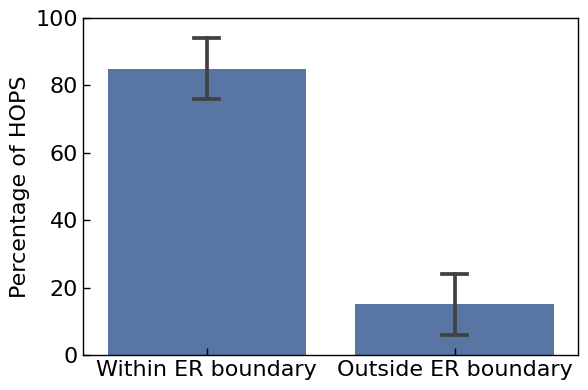

In [18]:
# Plotting
plt.figure(figsize=(6, 4))

# Define the custom colors
custom_palette = {
    "Inside ER": "#4C72B0",  # Standard blue
    "Outside ER": "#4C72B0"  
}

# Bar plot with error bars for percentage
ax = sns.barplot(data=plot_data, x="Category", y="Percentage", ci='sd', capsize=0.1, estimator=np.mean, palette=custom_palette)

# Customize axis labels and layout
plt.ylabel("Percentage of HOPS", fontsize=16)
plt.xlabel("", fontsize=16)
ax.set_xticklabels(["Within ER boundary", "Outside ER boundary"], fontsize=16)
plt.ylim(0, 100)

# Customize spines
for spine in plt.gca().spines.values():
    spine.set_linewidth(1)

plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=16,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)

# Save and show the plot
plt.tight_layout()
plt.savefig("percentage_hops_inside_outside_ER.png", format="png", bbox_inches="tight", dpi=300)
plt.show()

## The minimum distance between ER and HOPS

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog

In [20]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
)

In [21]:
dfs = [pd.read_csv(file) for file in csv_files]
filtered_dfs = [df[df['frame'] <= 25] for df in dfs]
combined_df = pd.concat(filtered_dfs, ignore_index=True)

In [22]:
pixel_to_nm_conversion = 117
filtered_data = combined_df['min_distance_to_ER'].dropna() * pixel_to_nm_conversion

In [23]:
print(f"Number of HOPS particles in histogram: {len(filtered_data)}")

Number of HOPS particles in histogram: 19478


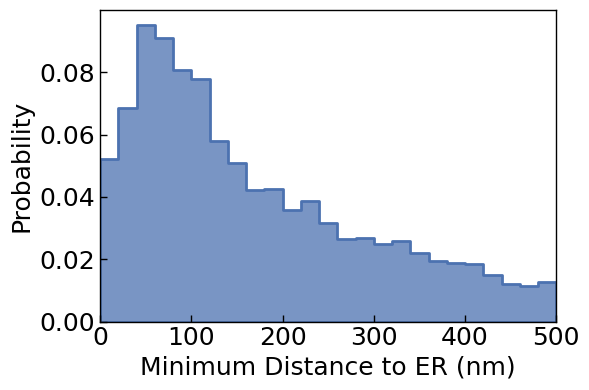

In [24]:
# Create the plot
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=filtered_data,
    bins=25,
    stat="probability",
    common_norm=False,
    binrange=(0, 500),  # Adjust range as needed
    lw=2,
    element="step",
    legend=False,
    color="#4C72B0"
)

# Customize axis labels and layout
plt.xlim(0, 500)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Minimum Distance to ER (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Save and show the plot
plt.tight_layout()
plt.savefig("minimum_distance_ER_HOPS.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

## Minimum distance to ER; both the inside ER and outside ER put together

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog


In [2]:
# Open file dialog to select CSV files
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
)

In [3]:
# Read each CSV file into a DataFrame
dfs = [pd.read_csv(file) for file in csv_files]

# Filter DataFrames where 'frame' is less than or equal to 25
filtered_dfs = [df[df['frame'] <= 25] for df in dfs]

# Combine all filtered DataFrames into one
combined_df = pd.concat(filtered_dfs, ignore_index=True)

# Conversion factor
pixel_to_nm_conversion = 117

# Replace NA values with 0, then apply the conversion
filtered_data = combined_df['min_distance_to_ER'].fillna(0) * pixel_to_nm_conversion

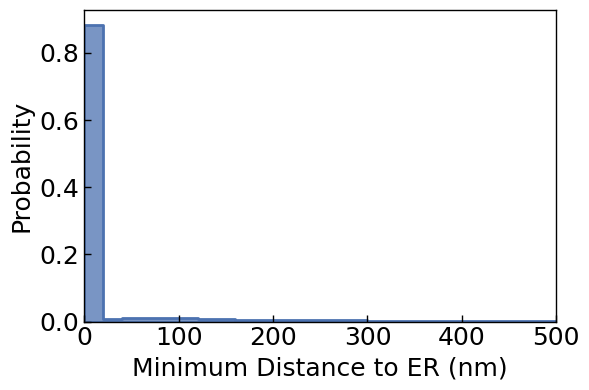

In [4]:
# Create the plot
plt.figure(figsize=(6, 4))

ax = sns.histplot(
    data=filtered_data,
    bins=25,
    stat="probability",
    common_norm=False,
    binrange=(0, 500),  # Adjust range as needed
    lw=2,
    element="step",
    legend=False,
    color="#4C72B0"
)

# Customize axis labels and layout
plt.xlim(0, 500)  # Adjust as needed
plt.ylim(0, None)
plt.xlabel(r"Minimum Distance to ER (nm)", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)

# Save and show the plot
plt.tight_layout()
plt.savefig("minimum_distance_ER_HOPS_zero_filled.png", format="png", bbox_inches="tight", dpi=600)
plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tkinter import filedialog

In [9]:
# Open file dialog to select CSV files
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*"))
)

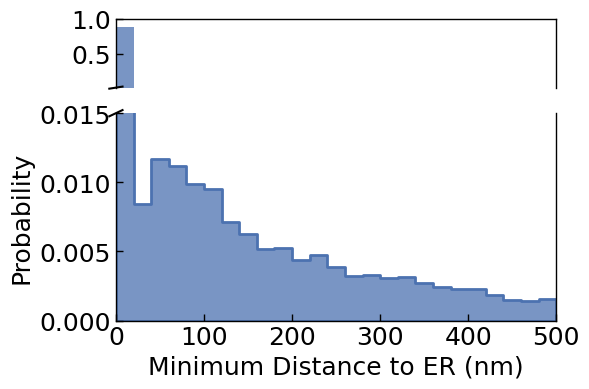

In [31]:
# Create the plot with an axis break
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4), gridspec_kw={'height_ratios': [1, 3]})

# Plot the main data with the spike
sns.histplot(
    data=filtered_data,
    bins=25,
    stat="probability",
    common_norm=False,
    binrange=(0, 500),
    lw=2,
    element="step",
    legend=False,
    color="#4C72B0",
    edgecolor='none',
    ax=ax1
)

# Set limits for ax1 to show the spike only
ax1.set_ylim(0.015, 1)
ax1.spines['bottom'].set_visible(False)
# ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
ax1.tick_params(axis="y", which="major", labelsize=18, direction="in", left=True, length=5, width=1)
ax1.set_ylabel("")

sns.histplot(
    data=filtered_data,
    bins=25,
    stat="probability",
    common_norm=False,
    binrange=(0, 500),
    lw=2,
    element="step",
    legend=False,
    color="#4C72B0",
    ax=ax2
)

# Limit ax2 to the area below the break
ax2.set_ylim(0, 0.015)

# Customize axis labels and layout
ax2.set_xlabel(r"Minimum Distance to ER (nm)", fontsize=18)
ax2.set_ylabel("Probability", fontsize=18)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis="both", which="major", labelsize=18, direction="in", bottom=True, left=True, length=5, width=1)
ax1.spines[:].set_linewidth(1)
ax2.spines[:].set_linewidth(1)

# Add cut marks (diagonal lines) to show the axis break
d = .015  # Proportion of axis length to use as breakpoint
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal

plt.xlim(0, 500)

# Save and show the plot
plt.tight_layout()
plt.savefig("minimum_distance_ER_HOPS_axis_break.png", format="png", bbox_inches="tight", dpi=600)
plt.show()